In [1]:
import nltk
# nltk.download('stopwords')
# nltk.download('punkt')
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report
from sqlalchemy import create_engine
import psycopg2
# from imblearn.over_sampling import SMOTE
from collections import Counter
# from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
# from imblearn.pipeline import Pipeline as imPipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import dotenv


In [3]:
conn = psycopg2.connect(
    dbname="postgres", 
    user="root", 
    password="password1", 
    host="localhost", 
    port="5432"
)

# Define your SQL query
query = 'SELECT * FROM "Issue"'


# Execute the query and load the result into a DataFrame
df = pd.read_sql(query, conn)
column_mapping = {
    "Summary": "summary",
    "Issue key": "issueKey",
    "Issue id": "issueId",
    "Issue Type": "issueType",
    "Status": "status",
    "Project key": "projectKey",
    "Project name": "projectName",
    "Priority": "priority",
    "Resolution": "resolution",
    "Assignee": "assignee",
    "Reporter (Email)": "reporterEmail",
    "Creator (Email)": "creatorEmail",
    "Created": "created",
    "Updated": "updated",
    "Last Viewed": "lastViewed",
    "Resolved": "resolved",
    "Due date": "dueDate",
    "Description": "description",
    "Partner Names": "partnerNames",
    "Custom field (Cause of issue)": "causeOfIssue",
    "Custom field (Record/Transaction ID)": "recordTransactionId",
    "Custom field (Region)": "region",
    "Custom field (Relevant Departments)": "relevantDepartments",
    "Custom field (Relevant Departments).1": "relevantDepartments1",
    "Custom field (Request Category)": "requestCategory",
    "Custom field (Request Type)": "requestType",
    "Custom field (Request language)": "requestLanguage",
    "Custom field (Resolution Action)": "resolutionAction",
    "Satisfaction rating": "satisfactionRating",
    "Custom field (Satisfaction date)": "satisfactionDate",
    "Custom field (Source)": "source",
    "Custom field (Time to first response)": "timeToFirstResponse",
    "Custom field (Time to resolution)": "timeToResolution",
    "Custom field (Work category)": "workCategory",
    "Status Category": "statusCategory",
    "Status Category Changed": "statusCategoryChanged",
    "Custom field ([CHART] Date of First Response)": "dateOfFirstResponse",
    "comments": "comments"
}

# Rename the columns in the DataFrame
df.rename(columns=column_mapping, inplace=True)

/tmp/ipykernel_11076/836763382.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


In [7]:
print(df.iloc[0]['comments'])

{"comment1": "07/10/2023 01:07;5fb17b020dd553006f17ff0a;Hi Darb,\n\nWe will look into this.", "comment2": "07/10/2023 01:07;5fb17b020dd553006f17ff0a;I think this needs to go to IT", "comment3": "07/10/2023 01:10;5fb29c170dd553006f224f06;h6. \u00f0\u0178\u008f\u00b3\u00ef\u00b8\u008f Message originally posted in [IT-4689|https://capitalareafoodbank.atlassian.net/browse/IT-4689] on 10/Jul/2023 01:09 PM\n\nOK I will look", "comment4": "07/10/2023 01:10;5fb29c170dd553006f224f06;h6. \u00f0\u0178\u008f\u00b3\u00ef\u00b8\u008f Message originally posted in [IT-4689|https://capitalareafoodbank.atlassian.net/browse/IT-4689] on 10/Jul/2023 01:10 PM\n\nDarb,\n\nCan you tell us more", "comment5": "07/10/2023 01:11;qm:65d20c5a-0c84-458e-8ce1-adb90d07460f:19f932b4-b42f-4723-a915-05c76f1f5806;This is what is happening\u00e2\u20ac\u00a6", "comment6": "07/10/2023 01:21;5fb29c170dd553006f224f06;{quote}*[IT-4689]* \"Ticket From - Partner Support - SO-XXXXXX - TEST\" has been changed to a status of *Comple

In [25]:
from collections import Counter
import pandas as pd
import nltk
from nltk.corpus import stopwords
import string


# Get the list of stop words
stop_words = set(stopwords.words('english'))

# Function to clean and tokenize comments
def clean_and_tokenize(text):
    # Remove punctuation and convert to lowercase
    text = text.translate(str.maketrans('', '', string.punctuation)).lower()
    tokens = [word for word in text.split() if word not in stop_words and not word.startswith('comment')]

    return tokens

# Apply the function to the comments column
all_comments = df['comments'].dropna().tolist()
tokens = [token for comment in all_comments for token in clean_and_tokenize(comment)]

# Perform frequency analysis
word_freq = Counter(tokens)

# Display the most common words
df_comment_word_freq = pd.DataFrame(word_freq.items(), columns=['word', 'frequency'])
df_comment_word_freq = df_comment_word_freq[df_comment_word_freq['frequency'] > 50].sort_values(by='frequency', ascending=False)
for i in df_comment_word_freq.itertuples():
    print(i.word, i.frequency)

order 1103
customer 1084
food 924
reply 771
support 740
contacting 723
area 713
n 669
request 664
please 607
nn 596
date 582
bank 533
nnthank 506
morning 462
thank 446
nnwe 442
day 441
soon 437
update 427
sent 412
resolved 408
hours 405
business 384
possiblennthank 375
ticket 363
email 351
team 333
youncustomer 331
relationsncapital 327
pm 327
updated 326
afternoon 325
capital 316
field 310
received 310
respond 300
service 298
produce 288
assistance 282
items 273
new 267
would 262
know 261
item 243
relations 242
delivery 240
jira 231
us 230
available 227
cafb 218
time 216
replied 213
nnd 211
nncharity 208
requests 203
let 202
next 194
response 192
done 191
waiting 188
orders 187
login 182
nnciarra 182
resolve 180
add 180
friday 179
recent 179
set 179
review 178
leave 178
latest 176
nnyou 174
reminder 172
portal 172
services 171
read 170
reaching 170
automated 170
recently 169
10 169
department 169
see 167
used 167
prior 166
monday 166
like 166
nni 165
afternoonnnthank 165
3 164
0426202

In [1]:

# Loading packages
import pandas as pd
import transformers
import torch
from transformers import AutoTokenizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

/home/parker/.local/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
from huggingface_hub import login
import os
import dotenv
dotenv.load_dotenv()
login(token=os.getenv("HUGGING_FACE"))

In [4]:
model_id = "meta-llama/Llama-3.1-8B"

pipeline = transformers.pipeline(
    "text-generation", model=model_id, model_kwargs={"torch_dtype": torch.bfloat16}, device_map="auto"
)

pipeline("Hey how are you doing today?")

KeyboardInterrupt: 

In [4]:
def get_completion_llama(prompt, model_pipeline=pipeline):
    messages = [{"role": "user", "content": prompt}]
    response = model_pipeline(
        messages,
        max_new_tokens=2000
    )
    return response[0]["generated_text"][-1]['content']

NameError: name 'pipeline' is not defined

In [ ]:

question = "What business insights can be extracted from the following ticket comments?"

prompt = f"""
You are a business analyst assistant helping to review IT service ticket data. Each ticket includes a "comments" field written by users and IT help.
It has the idescribing their experience, frustration, praise, or suggestions.

Analyze the following comments to extract meaningful business insights. Focus on identifying:

Common themes or recurring problems

User sentiments (positive, negative, neutral)

Suggestions or implicit requests for improvement

Any operational inefficiencies or team feedback that could help improve service

Respond with a concise summary of insights that could inform decision-making, followed by specific examples if applicable.
Context:

{df['comments']}
Question:
{question}
Answer:
"""

In [ ]:
get_completion_llama(prompt)

In [8]:
# from vaderSentiment import SentimentIntensityAnalyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import json

In [16]:
analyzer = SentimentIntensityAnalyzer()
count = 0
for sentence in df['comments']:
    if sentence is not None and sentence != '':
        j = json.loads(sentence)
        for i in j:
            singlesentence = j[i]
            # print(singlesentence)
            vs = analyzer.polarity_scores(singlesentence)
            if vs['neg'] > 0.5:
                print("{:-<65} {}".format(sentence, str(vs)))
        # print("{:-<65} {}".format(sentence, str(vs)))
    # count += 1
    # if count > 10:
    #     break

{"comment1": "11/05/2024 10:44;61536ea272f6970069fc1dbd;Good afternoon,\n\nThank you for reaching out to us! I connected with our Operations Department regarding your concern. Unfortunately, we cannot unstack the bins of fruit. We recommend exploring options for equipment that could help manage the unstacking of the bins.\n\nThe reason we stack the bins on top of each other is to save space in the truck, allowing us to load your entire order efficiently. There are limitations to the capacity we can utilize in the truck.\n\nAt this time, we do not have any other options, but I will inform our Operations Team of your concerns so they can take them into consideration.\n\nThank you,\n\n\"D\"", "comment2": "11/05/2024 11:12;qm:65d20c5a-0c84-458e-8ce1-adb90d07460f:5ebf50a5-88dc-407f-bd87-560084808b1f;Ok, thank you for getting back to me.", "comment3": "11/05/2024 03:22;61536ea272f6970069fc1dbd;No problem! "} {'neg': 0.599, 'neu': 0.401, 'pos': 0.0, 'compound': -0.4574}


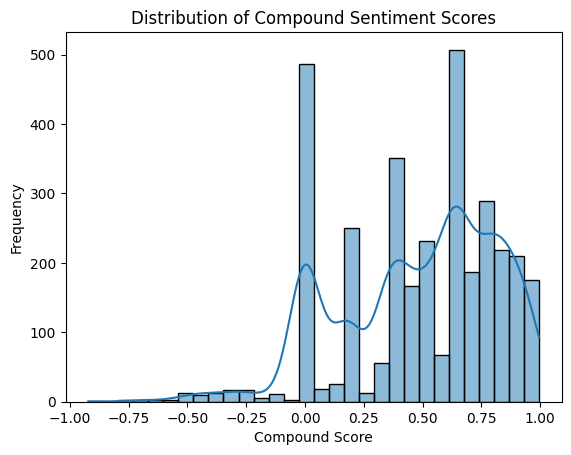

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import json
import pandas as pd
analyzer = SentimentIntensityAnalyzer()
sentiments = []

for sentence in df['comments']:
    if sentence:
        j = json.loads(sentence)
        for i in j:
            vs = analyzer.polarity_scores(j[i])
            sentiments.append(vs['compound'])  # Overall sentiment

# Histogram or KDE Plot
sns.histplot(sentiments, kde=True, bins=30)
plt.title("Distribution of Compound Sentiment Scores")
plt.xlabel("Compound Score")
plt.ylabel("Frequency")
plt.show()
